iteration:0, delta:82
iteration:1, delta:177.0
iteration:2, delta:418.5
iteration:3, delta:1110.0
iteration:4, delta:3678.75
iteration:5, delta:12448.125
iteration:6, delta:23959.6875
iteration:7, delta:21199.21875
iteration:8, delta:17694.140625
iteration:9, delta:43410.9375
iteration:10, delta:146511.9140625
iteration:11, delta:113953.7109375
estimation error:0.0


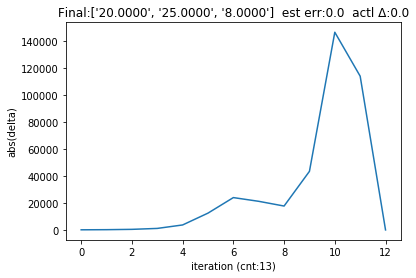

In [45]:
import numpy as np
import matplotlib.pyplot as plt



# Starting codes for the HA2 of CS596

# Fill in the codes between "%PLACEHOLDER#start" and "PLACEHOLDER#end"

# Ground-truth Cashier 
groundUnitPrice = np.array([20, 25, 8]) # for fish, chip, and ketchup, respectively

# step 1: initialize your guess on the unit prices of fish, chip and ketchup.
estimatedUnitPrice = np.array([10,10,10]) # initial unit prices.
#MAX_POSSIBLE_UNIT_PRICE = 50
#estimatedUnitPrice = np.random.randint(MAX_POSSIBLE_UNIT_PRICE, size=3) # choose random initial guesses

#PLACEHOLDER_1#start: set your own stopping conditions and learning rate
#condition 1: maximal iterations, stop.
MAX_ITERATION = 100000
#condition 2: if the difference between your prediction and the cashier's price is smaller than a threshold, stop. 
MIN_DELTA = 0.000001
# learning rate
ALPHA = .5 #1e-3
#PLACEHOLDER_1#end

# Y coordinates for plotting
deltaHistory = []

# step 2: iterative method
for i in range(0, MAX_ITERATION):
    # order a meal (simulating training data)
    randomMealPortions = np.random.randint(10, size=3)

    # calculate the estimated price     
    expectedTotalPrice = np.sum(estimatedUnitPrice * randomMealPortions )

    # calculate cashier/true price;     
    cashierPrice = np.sum(groundUnitPrice * randomMealPortions)

    #%%%PLACEHOLDER_2#start
    
    # calculate current error
    iterError = expectedTotalPrice - cashierPrice
    
    #Declaring Delta
    delta = abs(iterError)
    
    # append iterError to the history array
    deltaHistory.append(delta)
    
    #update unit prices 
    
    Theta_1 = estimatedUnitPrice[0] - ALPHA*(estimatedUnitPrice[0] - groundUnitPrice[0])*randomMealPortions[0]
    Theta_2 = estimatedUnitPrice[1] - ALPHA*(estimatedUnitPrice[1] - groundUnitPrice[1])*randomMealPortions[1]
    Theta_3 = estimatedUnitPrice[2] - ALPHA*(estimatedUnitPrice[2] - groundUnitPrice[2])*randomMealPortions[2]
     
    estimatedUnitPrice = np.array([Theta_1,Theta_2,Theta_3])
    
    #%%%%PLACEHOLDER_2#end

    #check stop conditions
    if abs(delta) < MIN_DELTA:
        break

    print('iteration:{}, delta:{}'.format(i, abs(delta)))


# step 3: evaluation
error = np.mean(abs(estimatedUnitPrice - groundUnitPrice))
print('estimation error:{}'.format(error))

# visualize convergence curve: error v.s. iterations

plt.plot(range(0, len(deltaHistory)), deltaHistory)
plt.xlabel('iteration (cnt:{})'.format(len(deltaHistory)))
plt.ylabel('abs(delta)')
plt.title('Final:{}  est err:{}  actl Δ:{}'.format([ '%.4f' % elem for elem in estimatedUnitPrice ], round(error, 4), round(delta, 4)))
plt.show()



